---
### Projectr : 하루시작 지하철 혼잡도 머신러닝 
### Description : 
    
### Author : Forrest Dpark
### Date : 2024.06.05+ ~
### Detail : 
### Update: 
    - 2024.06.06 by pdg :모델 돌리기 
        * 수업 내용을 적용해서 여러가지 모델과 cross validation, grid search, xgboost 등 모델링 적용
        * 현재 탑승인원 추정 알고리즘을 어떻게 적용할것인가? 각 역에서의 승하차 인원을 알면 전역에서 시간대별 탑승인원얘측가능

    
---

In [1]:
import pandas as pd ,numpy as  np # Data manipulatioin
import seaborn as sns,matplotlib.pyplot as plt # visiulization
import warnings;warnings.filterwarnings('ignore') # 경고 무시 
# 기본 세팅
from Functions import Service 
Service.plotSetting()


___## OS platform 한글 세팅완료 ## ___


In [2]:
mlTable_승차 = pd.read_csv("../Data/FinalDataset/mlTable_승차.csv")
mlTable_하차 = pd.read_csv("../Data/FinalDataset/mlTable_하차.csv")
mlTable_하차.head()

,월,주차,공휴일,연번,호선,요일,역명,승하차구분,역사코드,역_이름코드,...,15시인원,16시인원,17시인원,18시인원,19시인원,20시인원,21시인원,22시인원,23시인원,24시인원
0,1,52,1,970,7,0,장암,하차,2711,장암_2711,...,41,26,28,28,26,10,10,16,5,0.0
1,1,1,1,1514,7,1,장암,하차,2711,장암_2711,...,24,44,47,89,117,64,41,22,14,0.0
2,1,1,1,2060,7,2,장암,하차,2711,장암_2711,...,32,42,45,93,114,63,46,32,15,0.0
3,1,1,1,2608,7,3,장암,하차,2711,장암_2711,...,35,29,54,113,107,70,44,21,14,0.0
4,1,1,1,3152,7,4,장암,하차,2711,장암_2711,...,29,51,44,94,107,57,42,21,7,0.0


In [3]:
input_column=['월', '주차', '공휴일', '요일', '역사코드', '주중', '주말',
    'latitude', 'longitude', '05배차', '06배차', '07배차', '08배차', '09배차', '10배차',
    '11배차', '12배차', '13배차', '14배차', '15배차', '16배차', '17배차', '18배차', '19배차',
    '20배차', '21배차', '22배차', '23배차', '24배차']
target_column=['05시인원', '06시인원', '07시인원',
    '08시인원', '09시인원', '10시인원', '11시인원', '12시인원', '13시인원', '14시인원', '15시인원',
    '16시인원', '17시인원', '18시인원', '19시인원', '20시인원', '21시인원', '22시인원', '23시인원',
    '24시인원']


training_table_승차 = mlTable_승차[input_column]
target_table_승차 = mlTable_승차[target_column]
training_table_하차 = mlTable_하차[input_column]
target_table_하차 = mlTable_하차[target_column]

In [4]:
Service.MultiOutputRegressorFunc(training_table_승차, target_table_승차)

Model score: 0.7934133162381896
[[ 332.   745.6 1668.  1543.8  875.6  575.8  524.2  535.   520.4  539.
   522.8  537.4  543.4  603.6  350.2  228.4  185.8  123.2   52.8    8.4]
 [ 161.2  267.6  723.2 1071.2  587.4  322.2  332.6  330.6  301.6  300.4
   339.4  464.8  491.   847.4  336.6  272.6  233.4  190.8   78.8   13.6]
 [ 138.2  523.  1439.4 1139.8  575.4  392.6  376.4  391.8  390.4  430.8
   494.8  549.   482.4  427.   202.   111.6   93.6   74.6   22.8    0. ]
 [ 245.6  451.4  987.6 1333.2  872.2  638.2  577.6  616.8  599.2  557.6
   570.4  620.6  625.6  567.4  391.4  278.4  261.   231.2  119.    20.6]
 [  55.8  238.4  677.6  441.6  119.8   59.2   53.4   60.4   53.4   52.4
    59.2   92.8   93.8   80.2   33.4   27.    24.2    9.6    3.2    0. ]]


In [5]:
Service.MultiOutputRegressorFunc(training_table_하차, target_table_하차)

Model score: 0.8099246587986736
[[  27.6  170.2  273.4  549.6  479.   435.6  479.2  494.2  416.6  414.2
   528.8  673.8  899.4 1425.2 1562.6  781.4  597.6  518.6  322.8  116. ]
 [  30.2  134.2  450.4 1154.6  394.   285.4  248.8  266.8  283.2  276.
   314.2  358.2  545.4  956.2  714.6  418.4  347.4  301.6  178.6   77.6]
 [  23.4  169.   247.8  451.4  676.8  695.   523.   485.   458.4  409.
   428.8  511.4  650.4  907.6 1235.6  670.8  556.4  479.4  385.2    0. ]
 [  33.   150.   225.6  488.8  349.6  333.6  393.   433.6  501.6  567.8
   674.6  851.2  956.8 1271.   932.2  621.4  621.   570.2  369.6  127.6]
 [   5.6   35.    46.    46.6   38.6   34.8   50.2   43.2   31.8   36.2
    30.8   35.6   44.2   95.   106.4   55.2   41.6   28.8    9.4    0. ]]


In [6]:
mlTable_승차['역명'].unique()

array(['장암', '도봉산', '수락산', '마들', '노원', '중계', '하계', '공릉(서울과학기술대)', '태릉입구',
       '먹골', '중화', '상봉(시외버스터미널)', '면목', '사가정', '용마산(용마폭포공원)', '중곡',
       '군자(능동)', '어린이대공원(세종대)', '건대입구', '뚝섬유원지', '청담', '강남구청', '학동', '논현',
       '반포', '고속터미널', '내방', '이수', '남성', '숭실대입구(살피재)', '상도', '장승배기',
       '신대방삼거리', '보라매', '신풍', '대림(구로구청)', '남구로', '가산디지털단지', '철산', '광명사거리',
       '천왕', '온수(성공회대입구)'], dtype=object)

<Figure size 1400x500 with 0 Axes>

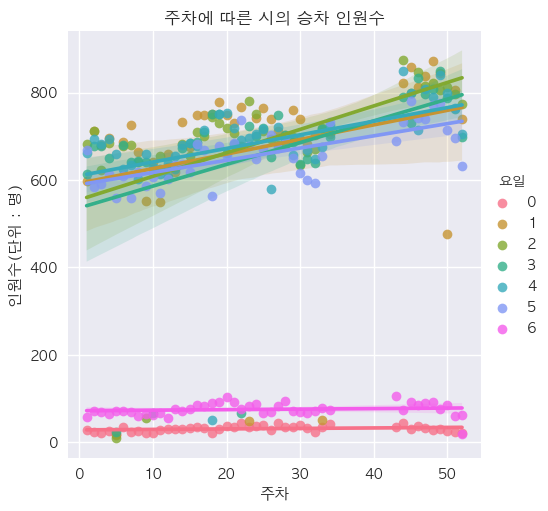

In [7]:
def trainingTargetAnalysis(training_table, target_table):
    print(" ")
    """
        # Description : train, target validation 
        # Date : 2024.06.07
        # Author :  pdg
        # Detail:
            * training_table (df): train data
            * target_table (df): target data
            * Returns: - 
        # Updata:
            2024.06.07 by pdg : 학습데이터 validation 및 데이터 시각화  
                * 주석 달았음. 
    """
    import pandas as pd, numpy as np
    import matplotlib.pyplot as plt ,seaborn as sns
    from sklearn.model_selection import train_test_split
    from sklearn.multioutput import MultiOutputRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    test= pd.concat([training_table, target_table],axis=1)
    t2711=test[test['역사코드']==2711]
    
    plt.figure(figsize=(14, 5))
    sns.lmplot(
        x='주차',
        y='07시인원',
        hue='요일',
        data=t2711
    )
    plt.title(f'주차에 따른 시의 승차 인원수')
    plt.ylabel('인원수(단위 : 명)')
    plt.xlabel('주차')

    plt.show()
        
trainingTargetAnalysis(training_table_승차, target_table_승차)

중곡의 역사 코드는 2726입니다


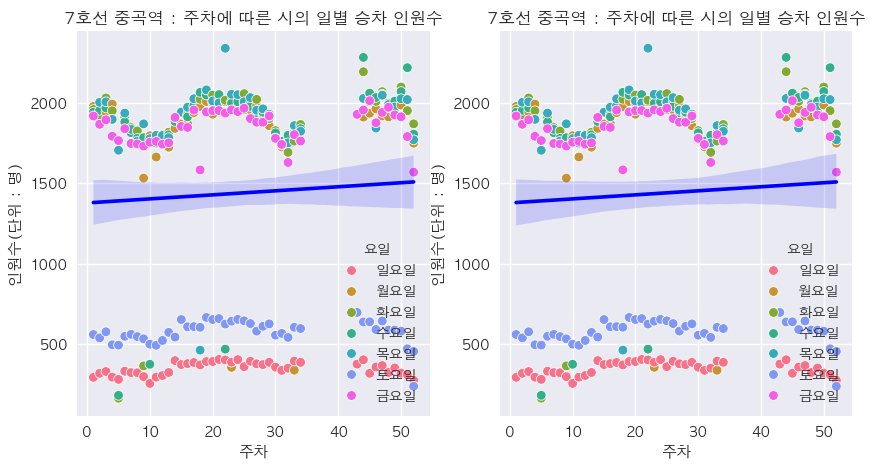

In [8]:

training_table_승차.to_numpy()
target_table_승차.to_numpy()
test= pd.concat([training_table_승차,target_table_승차],axis=1,)
def sdtation_inout_lmplot(mlTable,line,station_name):
    code = Service.station_name_to_code(line,station_name)
    test=mlTable[mlTable['역사코드'] ==code]
    # print(test.info)
    day_mapping = {
        0: '일요일',
        1: '월요일',
        2: '화요일',
        3: '수요일',
        4: '목요일',
        5: '금요일',
        6: '토요일',
        7: '일요일'  # Assuming 0 and 7 both map to Sunday
    }

    # Map the '요일' column to day names
    test['요일'] = test['요일'].map(day_mapping)
    
    
    n = 2 # n은 샘플 갯수
    ratio =5
    # 한 줄에 10개씩 이미지 생성, 샘플 갯수를 10으로 나누어 전체 행 갯수 파악 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 갯수는 샘플 갯수이고 그렇지 않으면 10개 입니다. 
    cols = n if rows <2 else 10
    fig, axes = plt.subplots(
        rows,
        cols,
        figsize = (cols*ratio, rows*ratio),
        squeeze= False
    )
    for i in range(rows):
        for j in range(cols):
            if i*10 +j < n : # n 까지만 그림
                ax = axes[i,j]
                sns.scatterplot(
                    x='주차',
                    y='08시인원',
                    hue='요일',
                    data=test,
                    ax=ax,
                    legend=True
                )
                sns.regplot(
                    x='주차',
                    y='08시인원',
                    data=test,
                    scatter=False,
                    ax=ax,
                    color='blue'
                )
                ax.set_title(f"{i},{j}")
                ax.set_title(f'{line} {station_name}역 : 주차에 따른 시의 일별 승차 인원수')
                ax.set_ylabel('인원수(단위 : 명)')
                ax.set_xlabel('주차')
    plt.show(ax)

    
    
    

    
sdtation_inout_lmplot(test,'7호선','중곡')

중곡의 역사 코드는 2726입니다


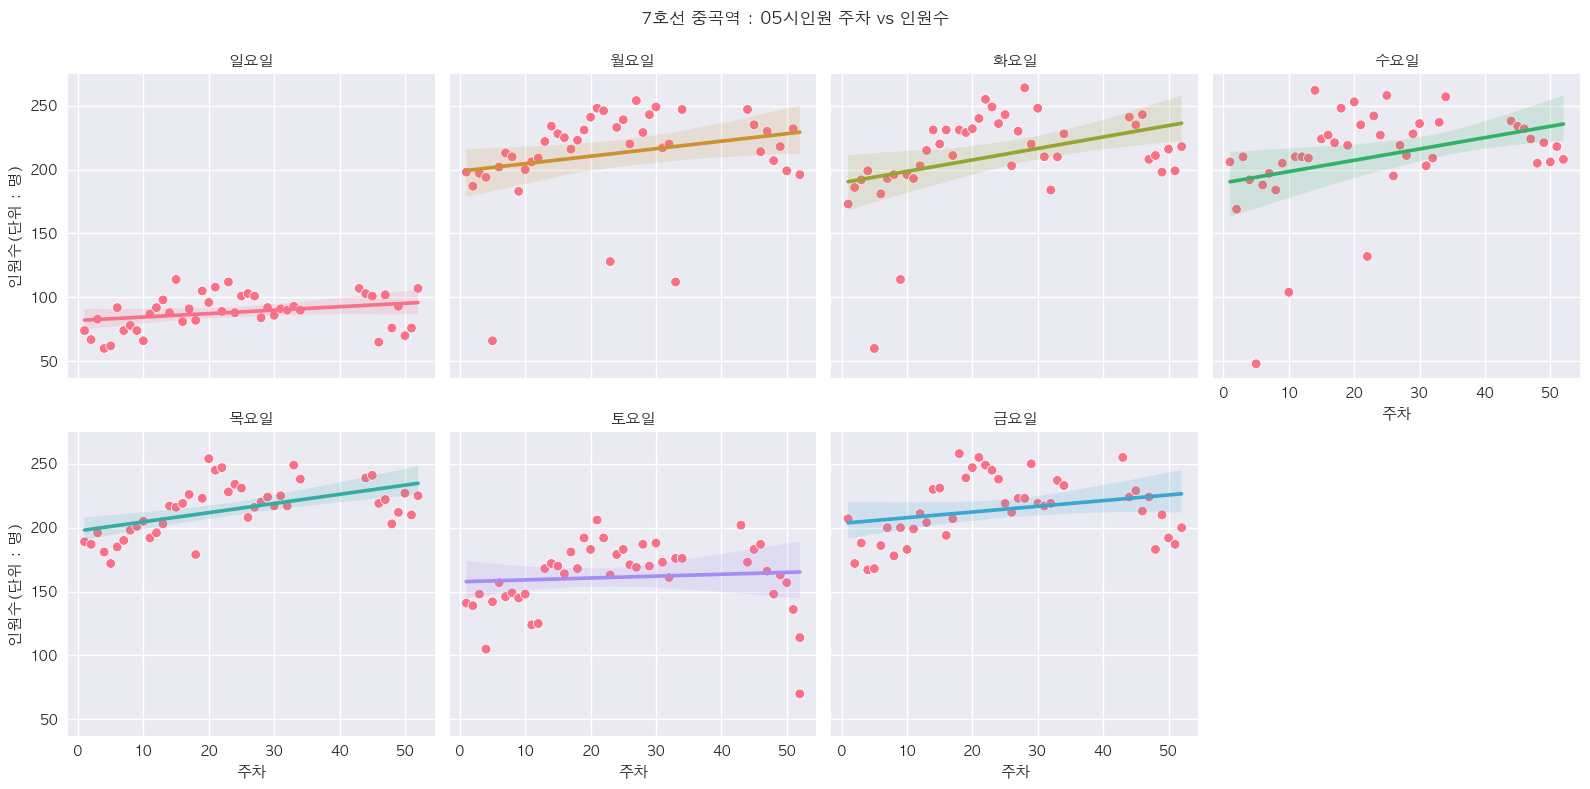

중곡의 역사 코드는 2726입니다


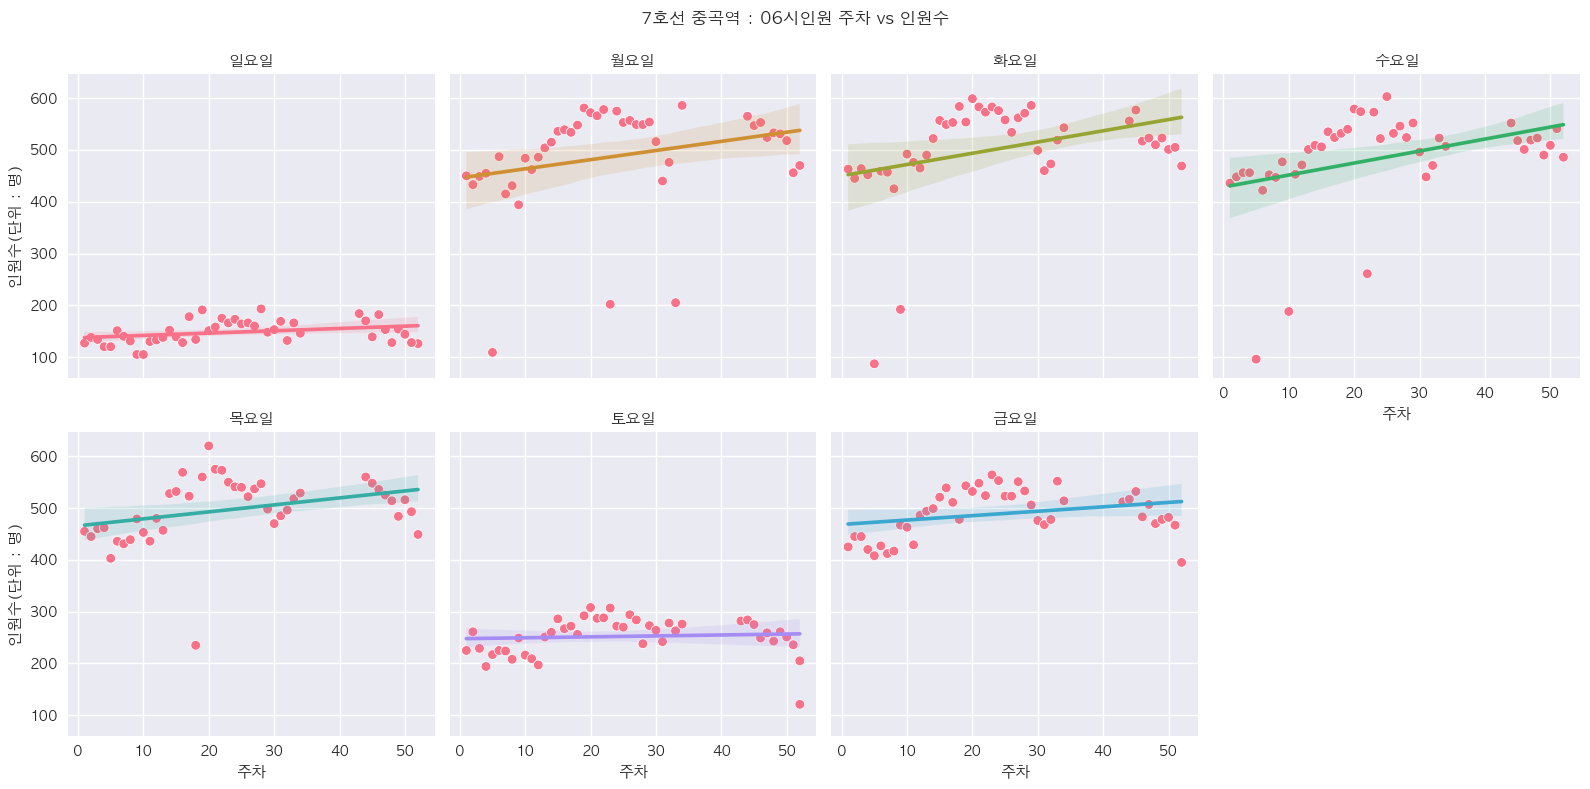

중곡의 역사 코드는 2726입니다


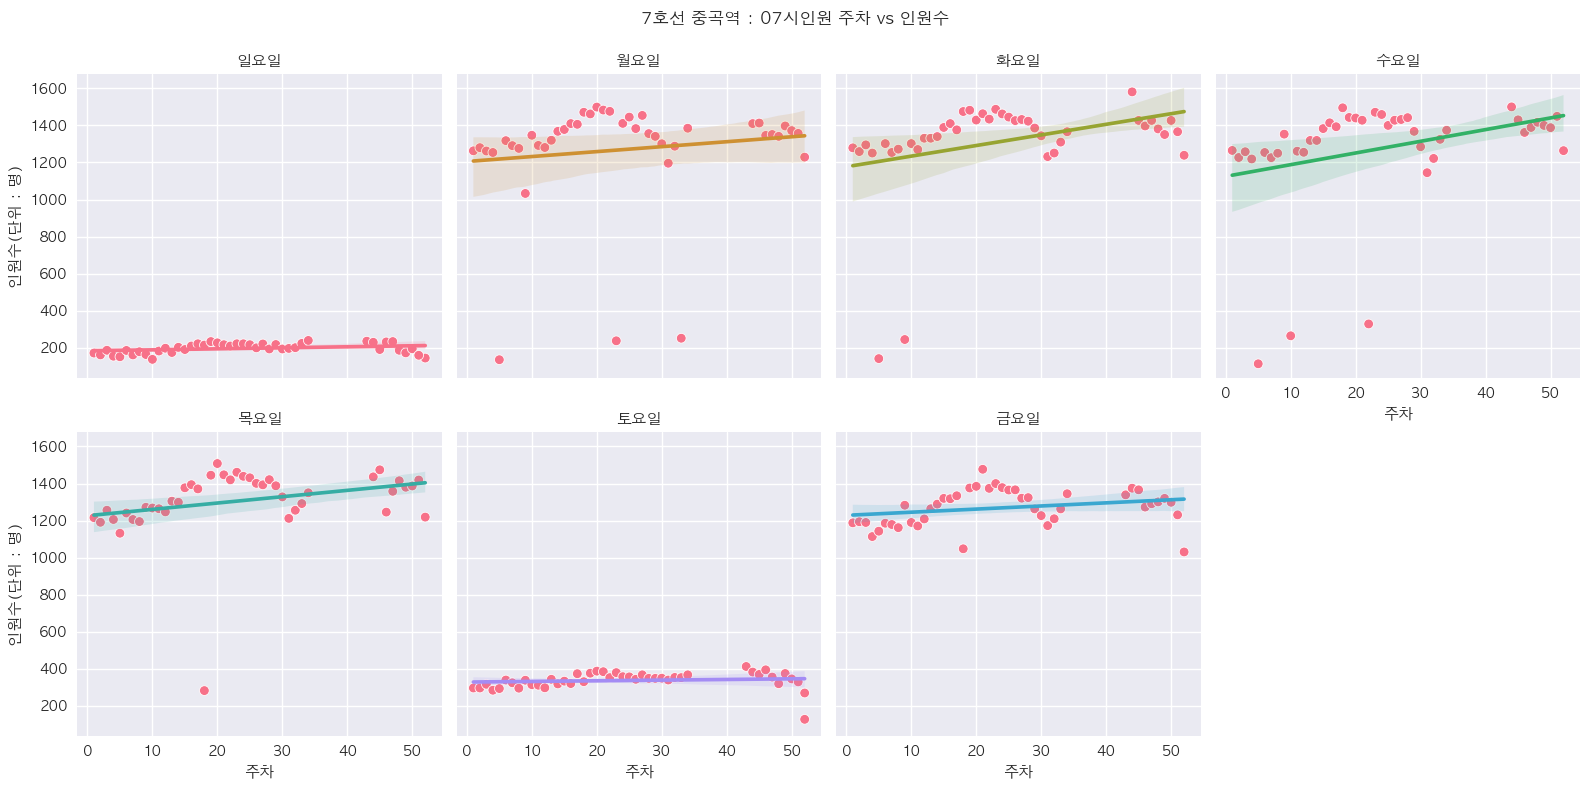

중곡의 역사 코드는 2726입니다


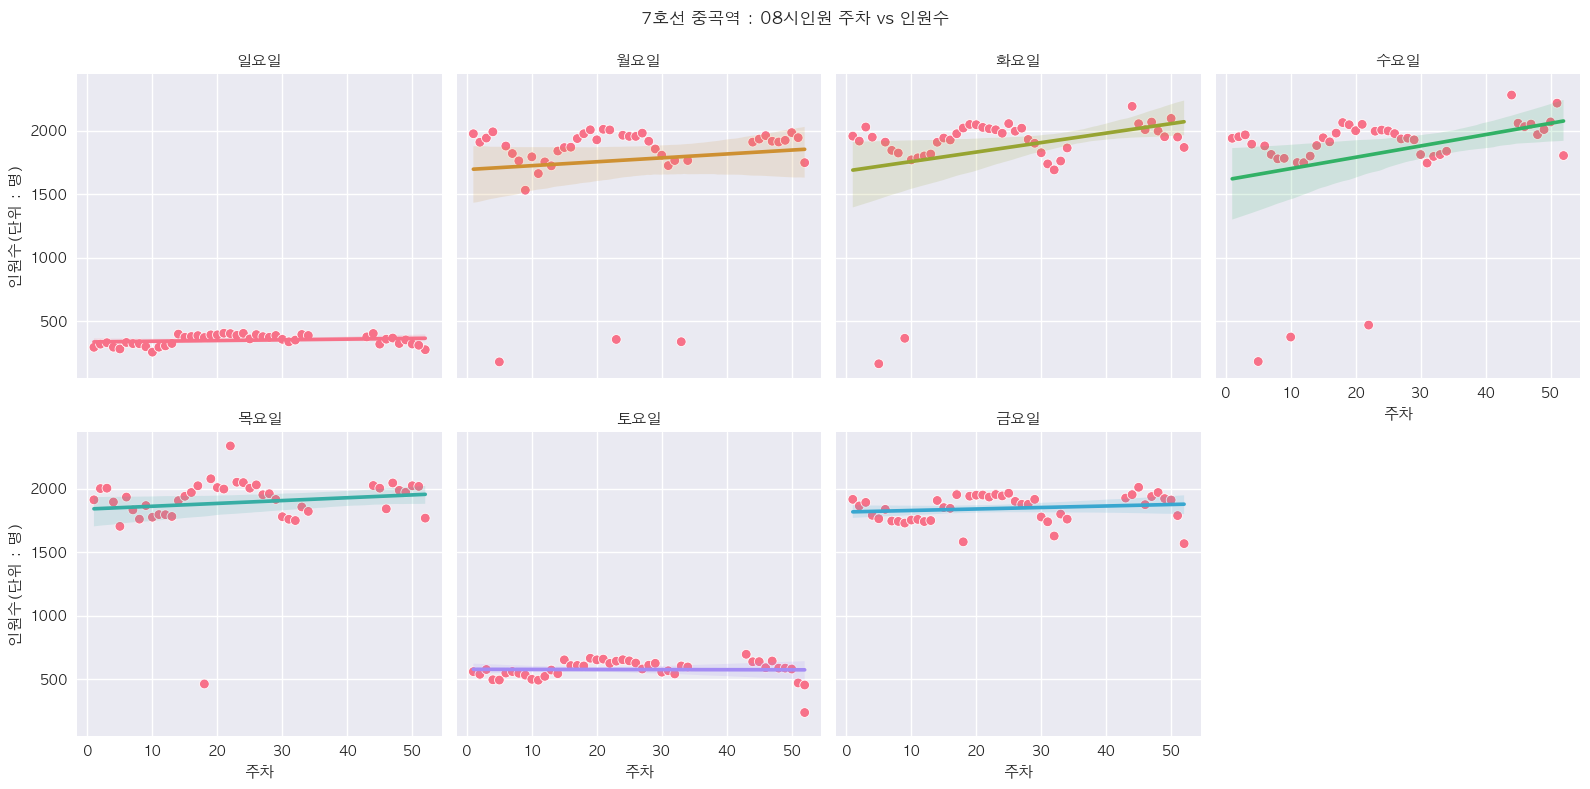

중곡의 역사 코드는 2726입니다


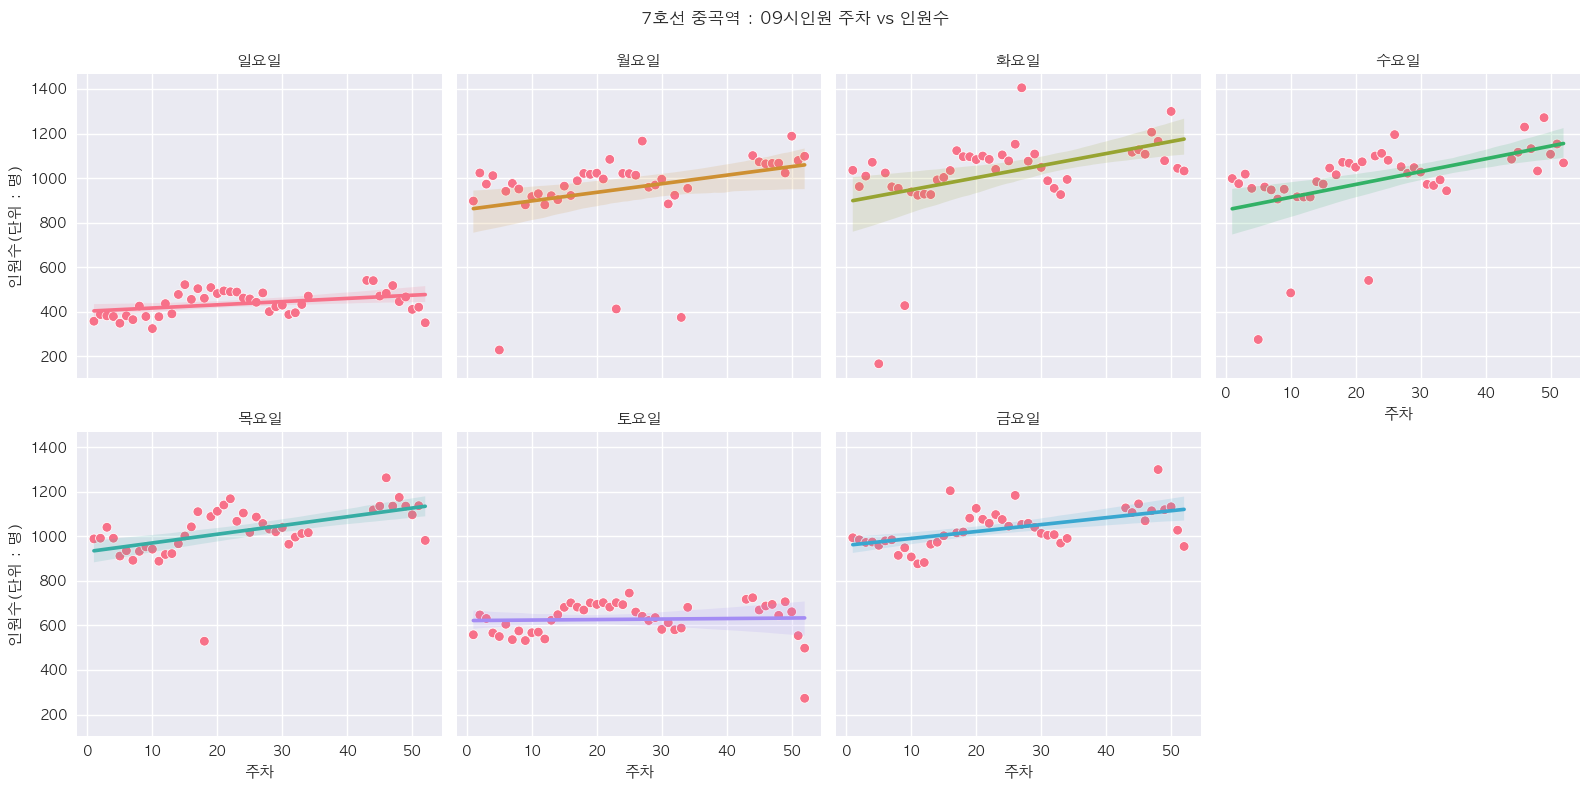

중곡의 역사 코드는 2726입니다


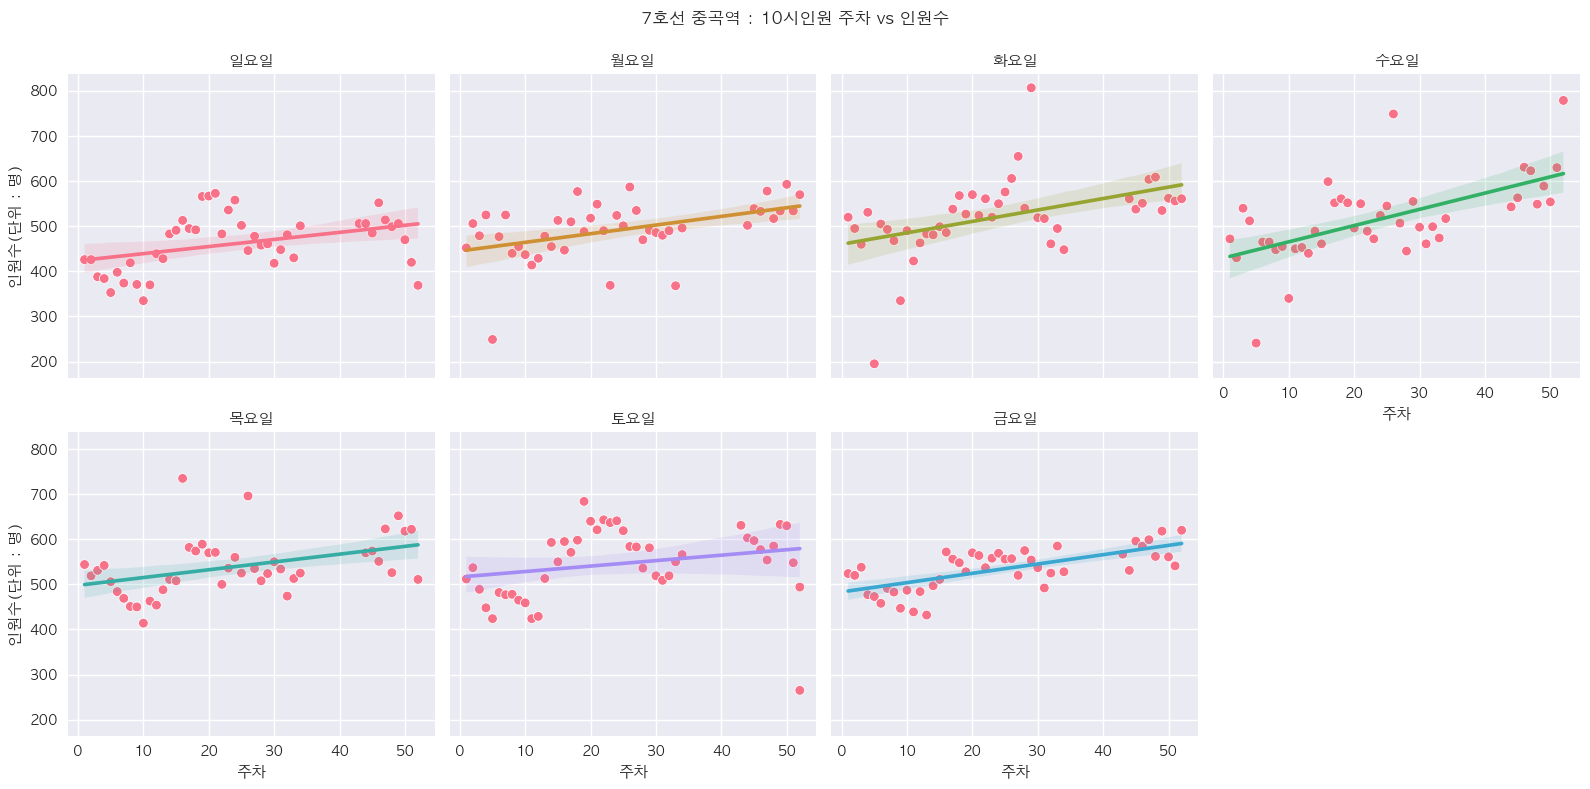

중곡의 역사 코드는 2726입니다


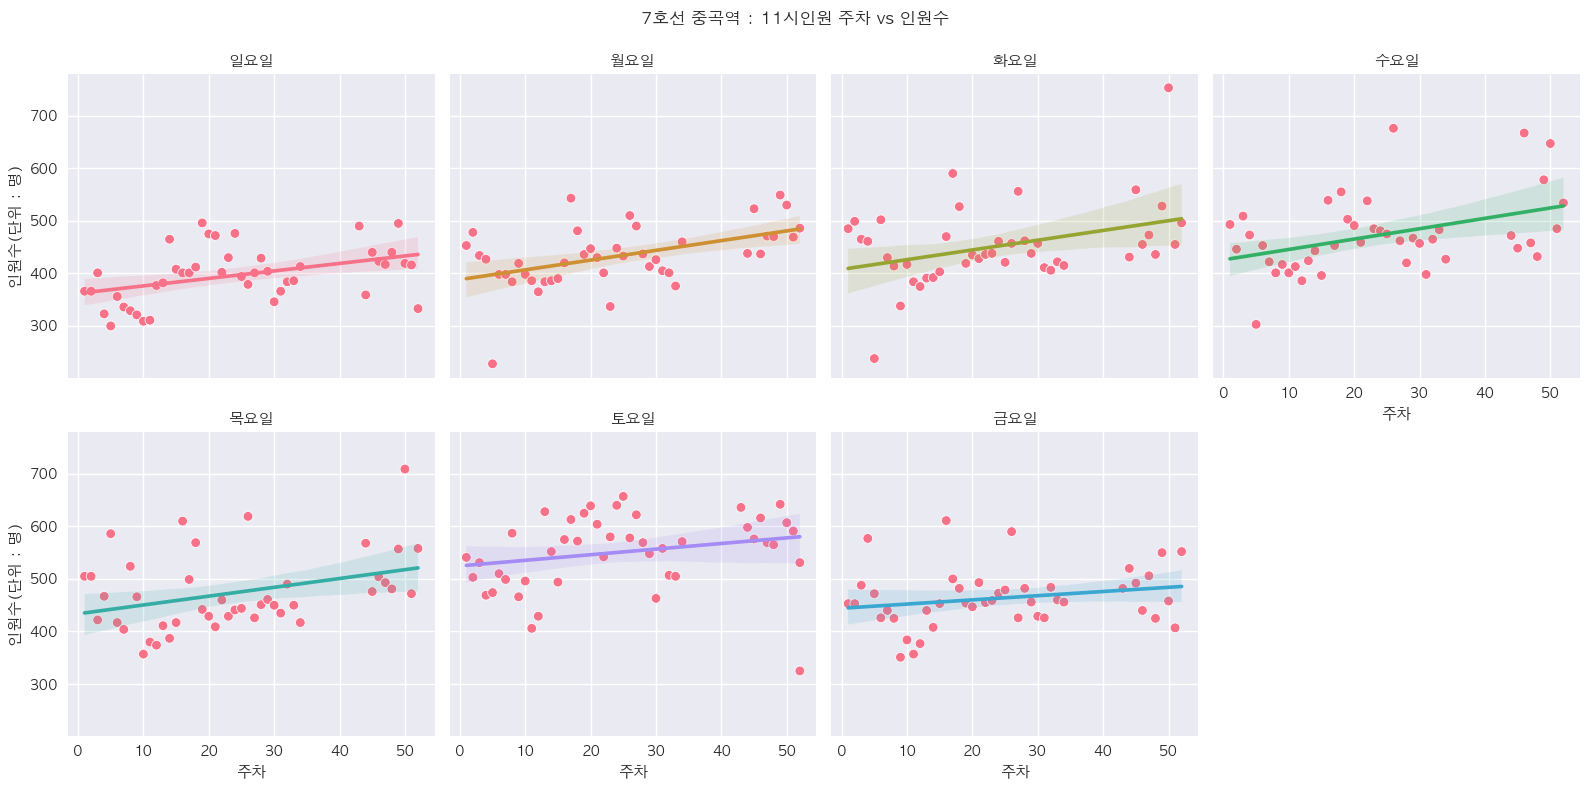

중곡의 역사 코드는 2726입니다


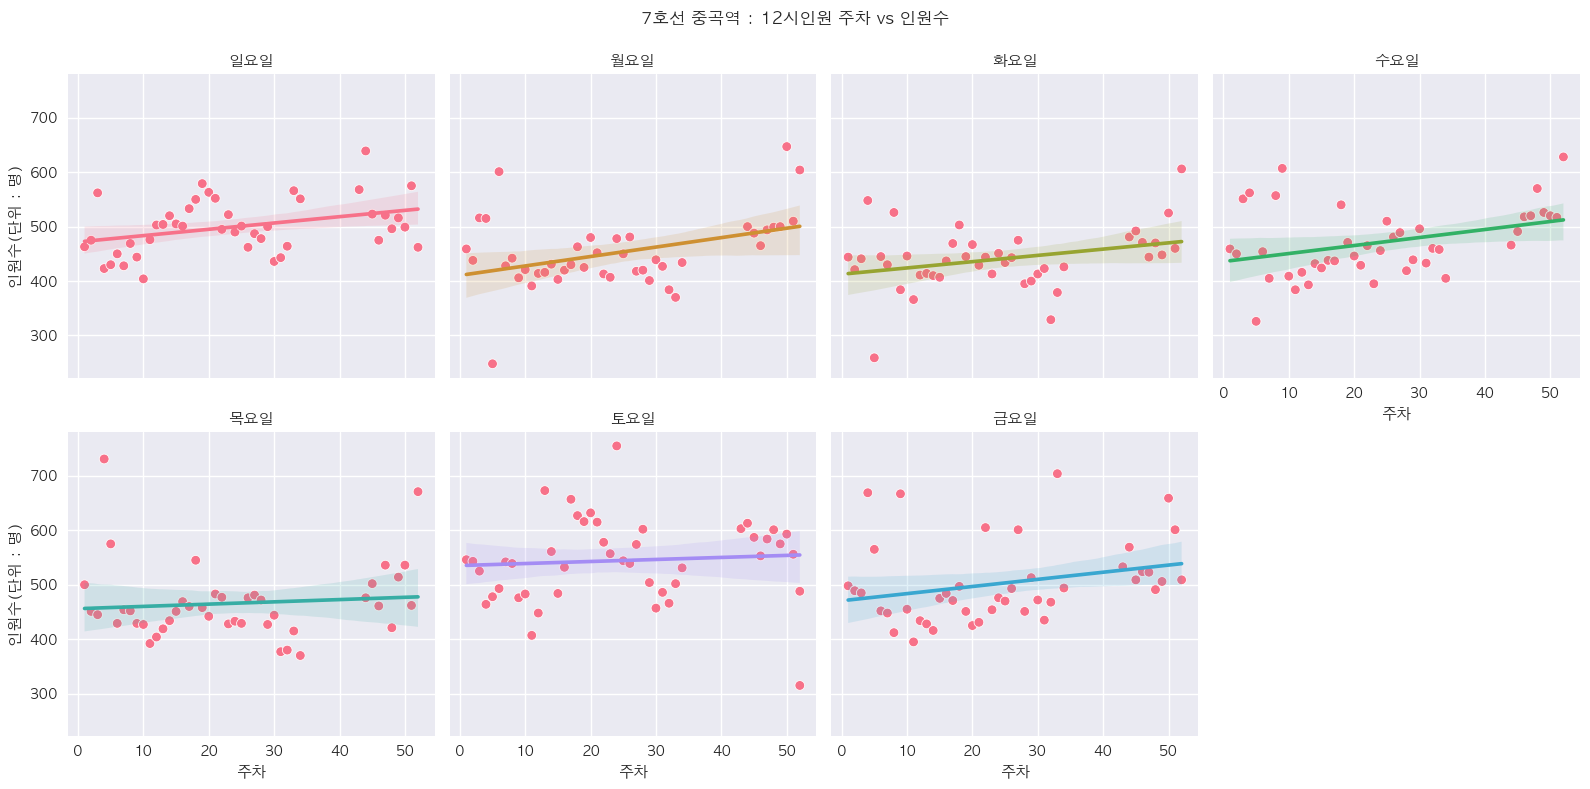

중곡의 역사 코드는 2726입니다


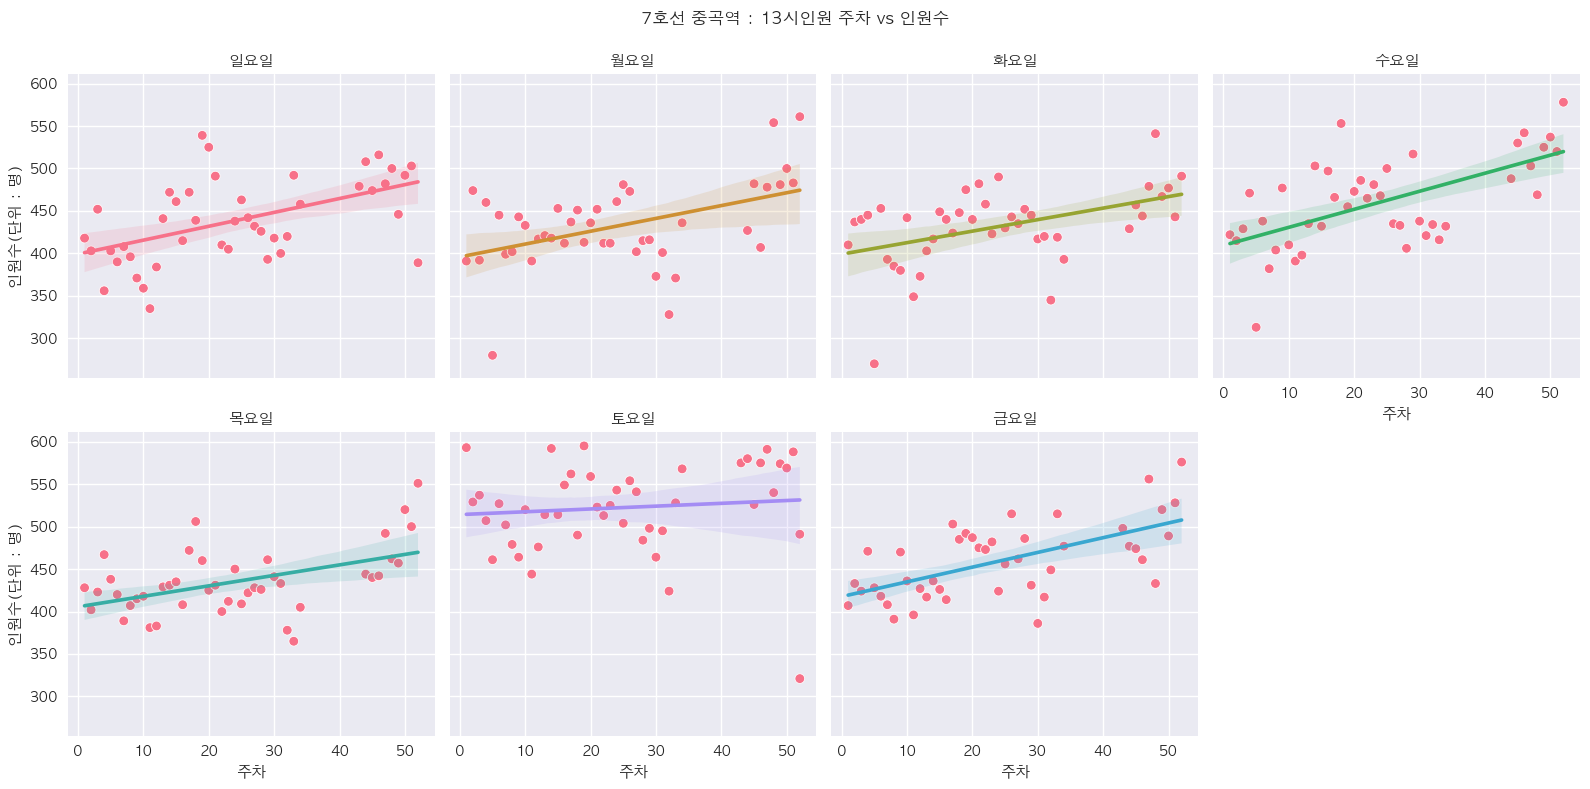

중곡의 역사 코드는 2726입니다


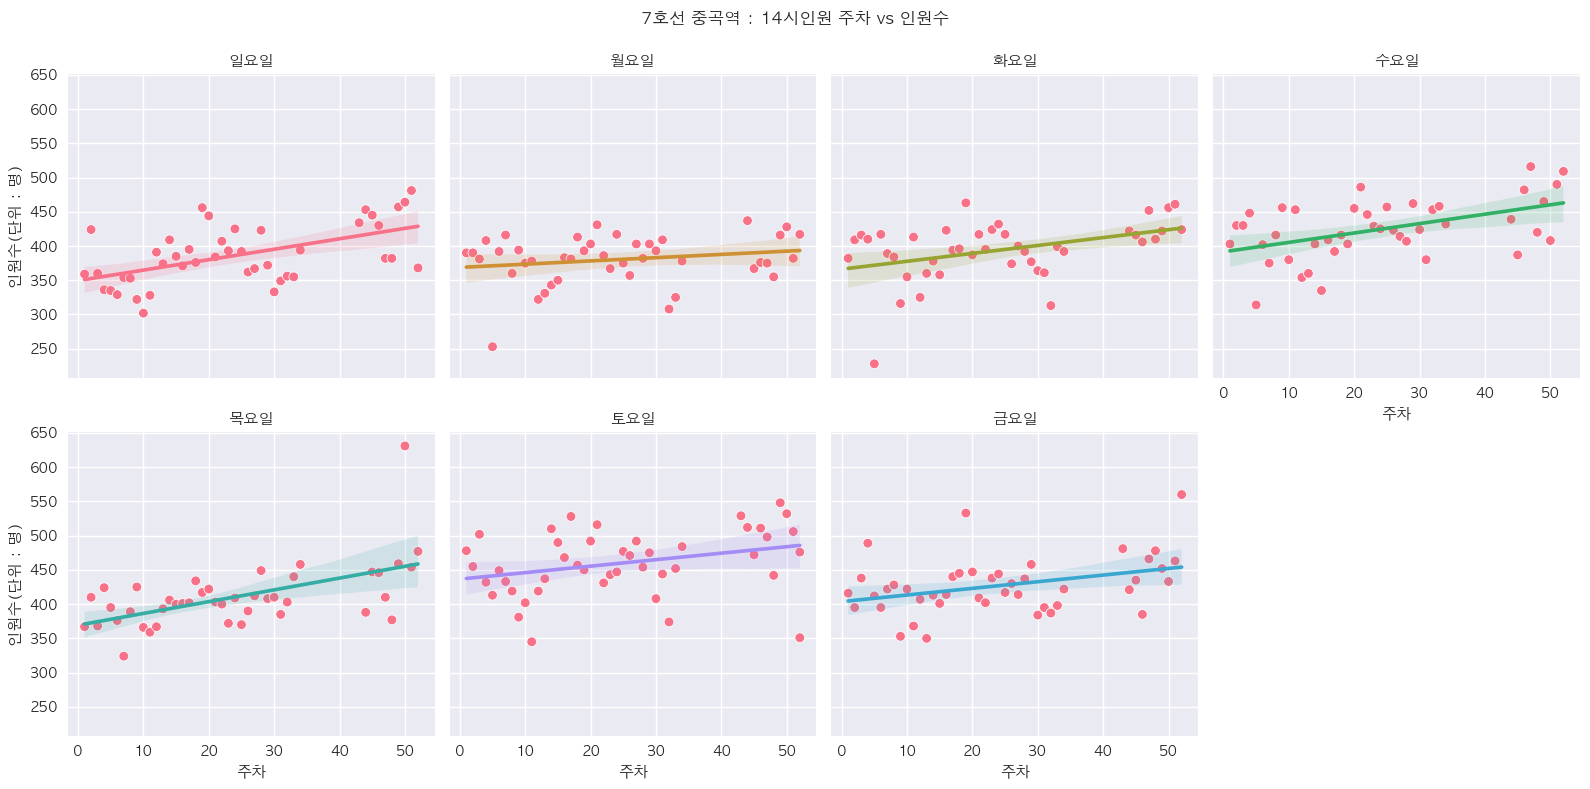

중곡의 역사 코드는 2726입니다


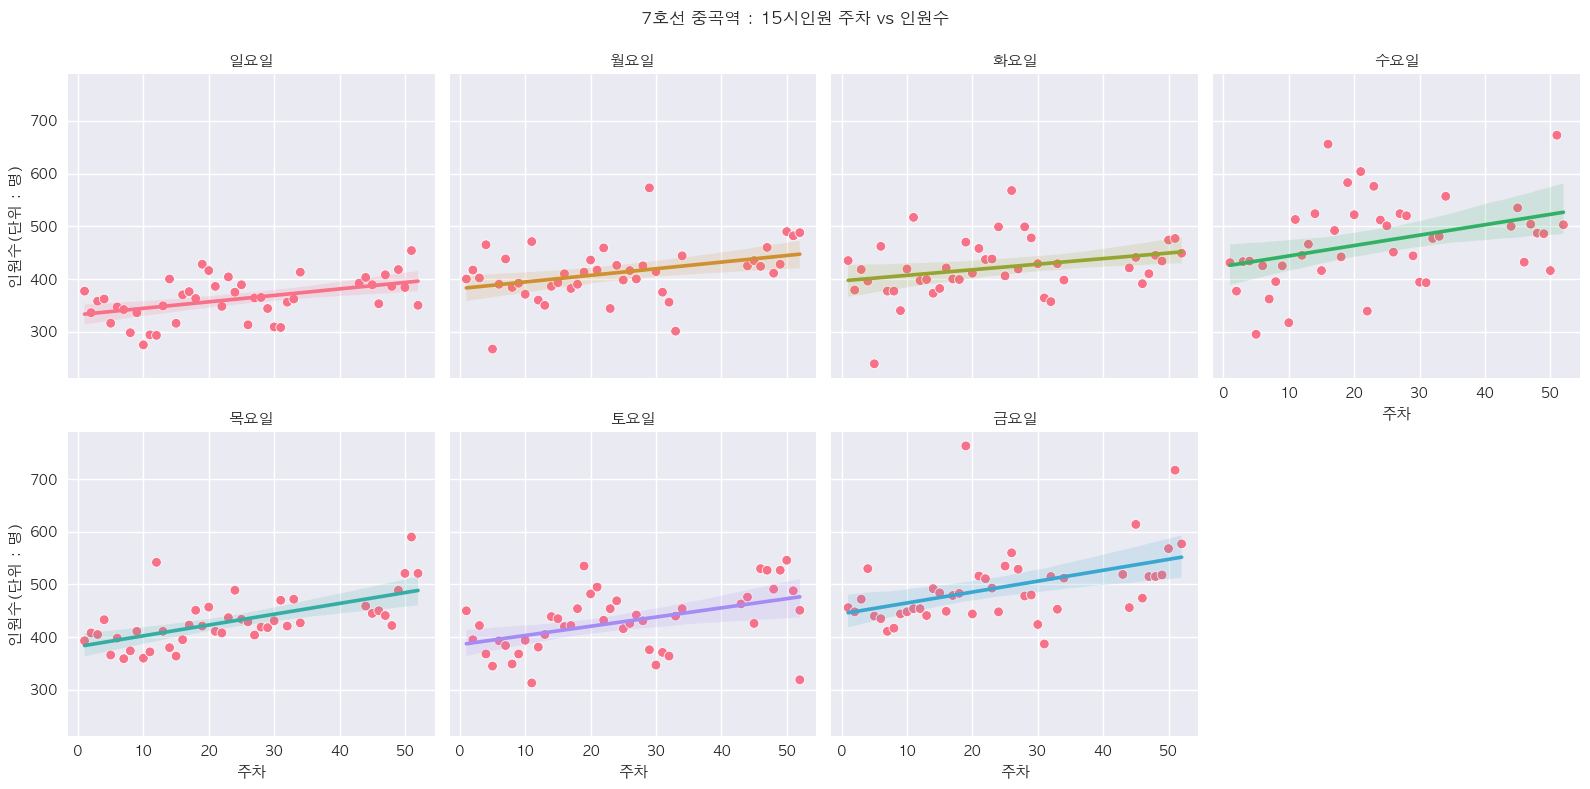

중곡의 역사 코드는 2726입니다


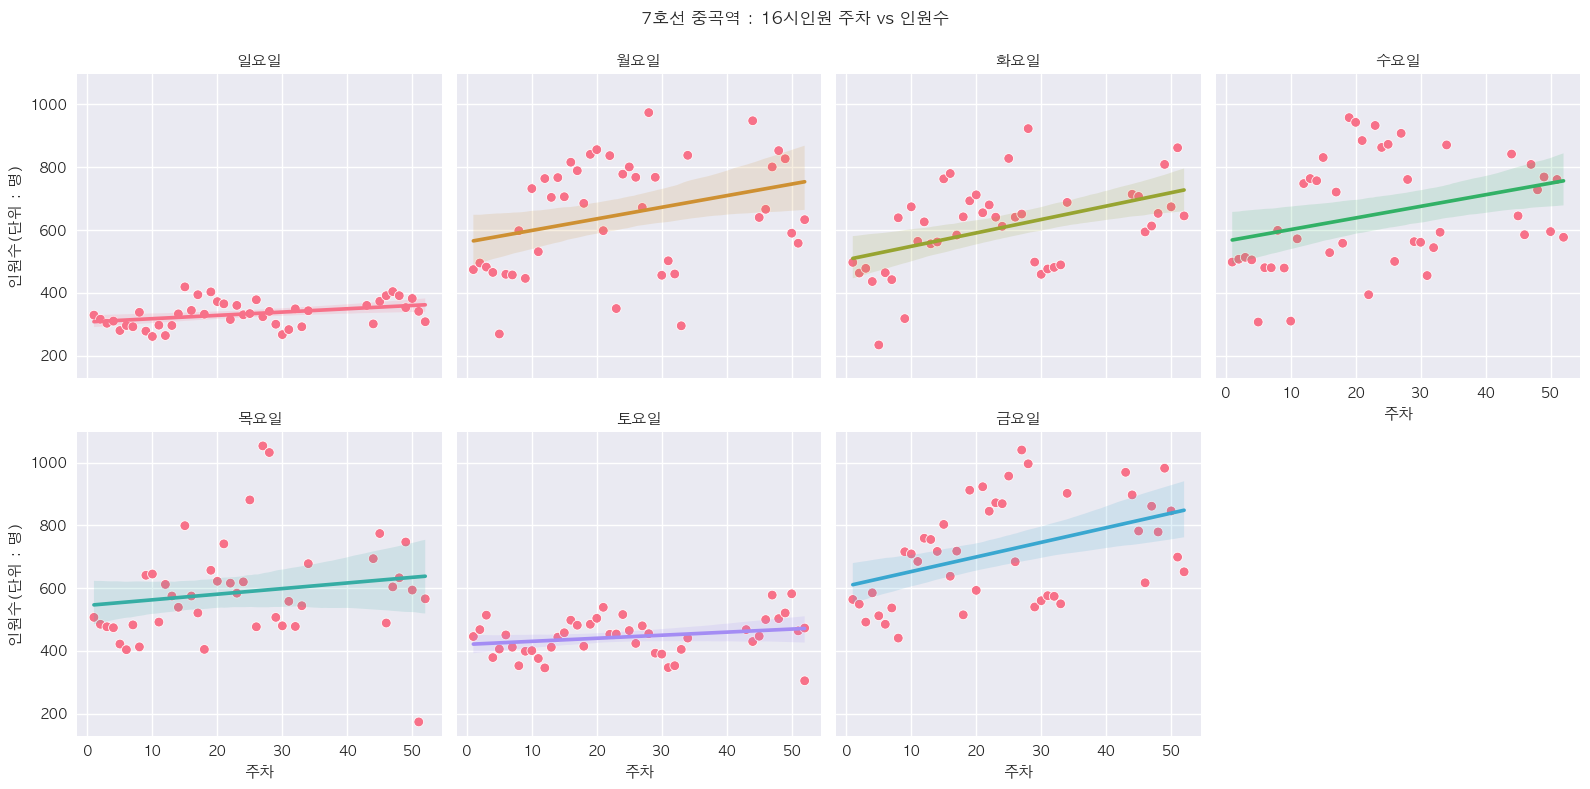

중곡의 역사 코드는 2726입니다


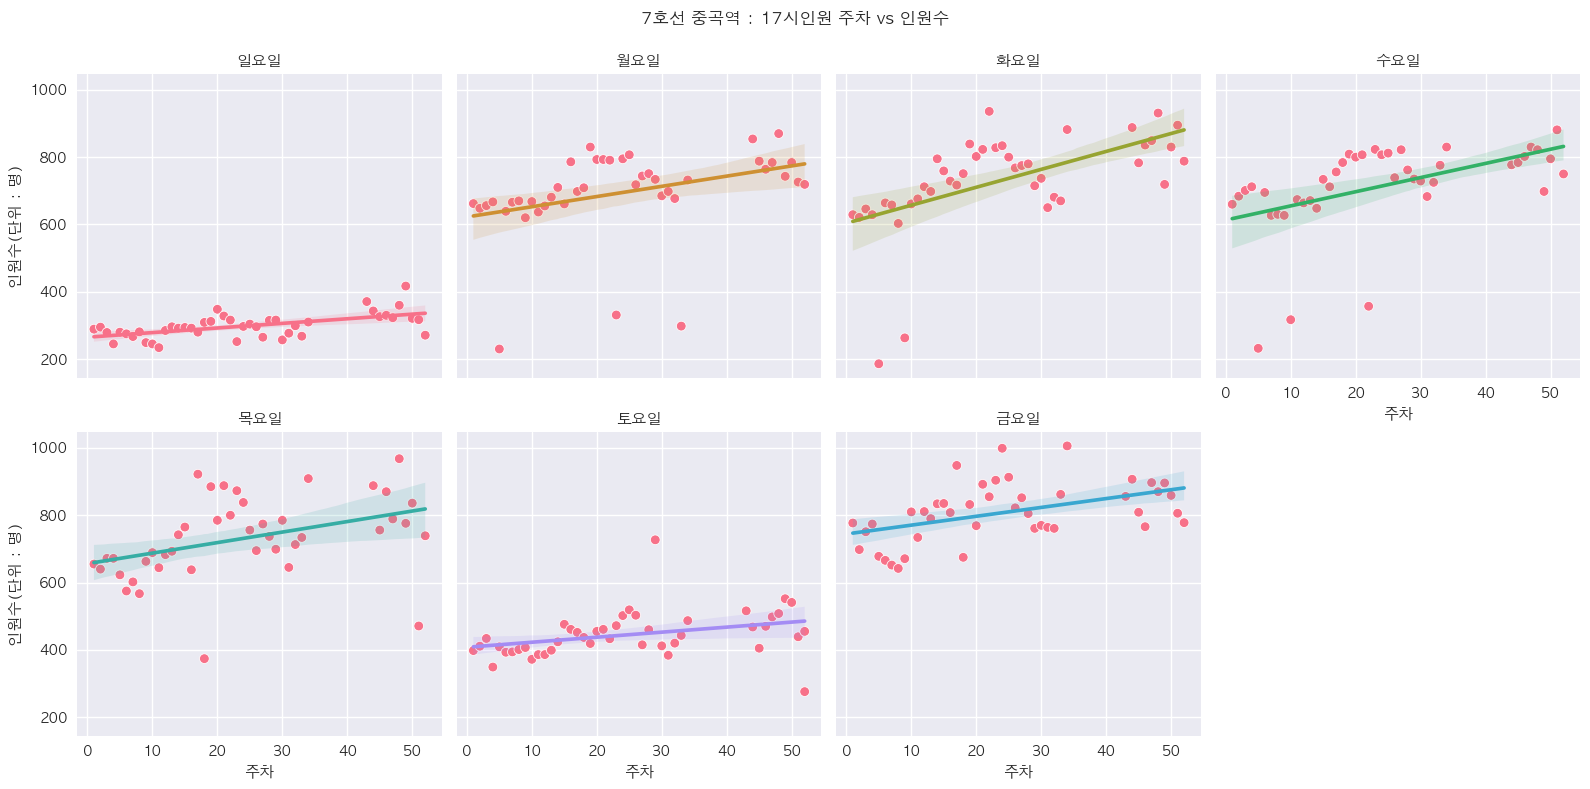

중곡의 역사 코드는 2726입니다


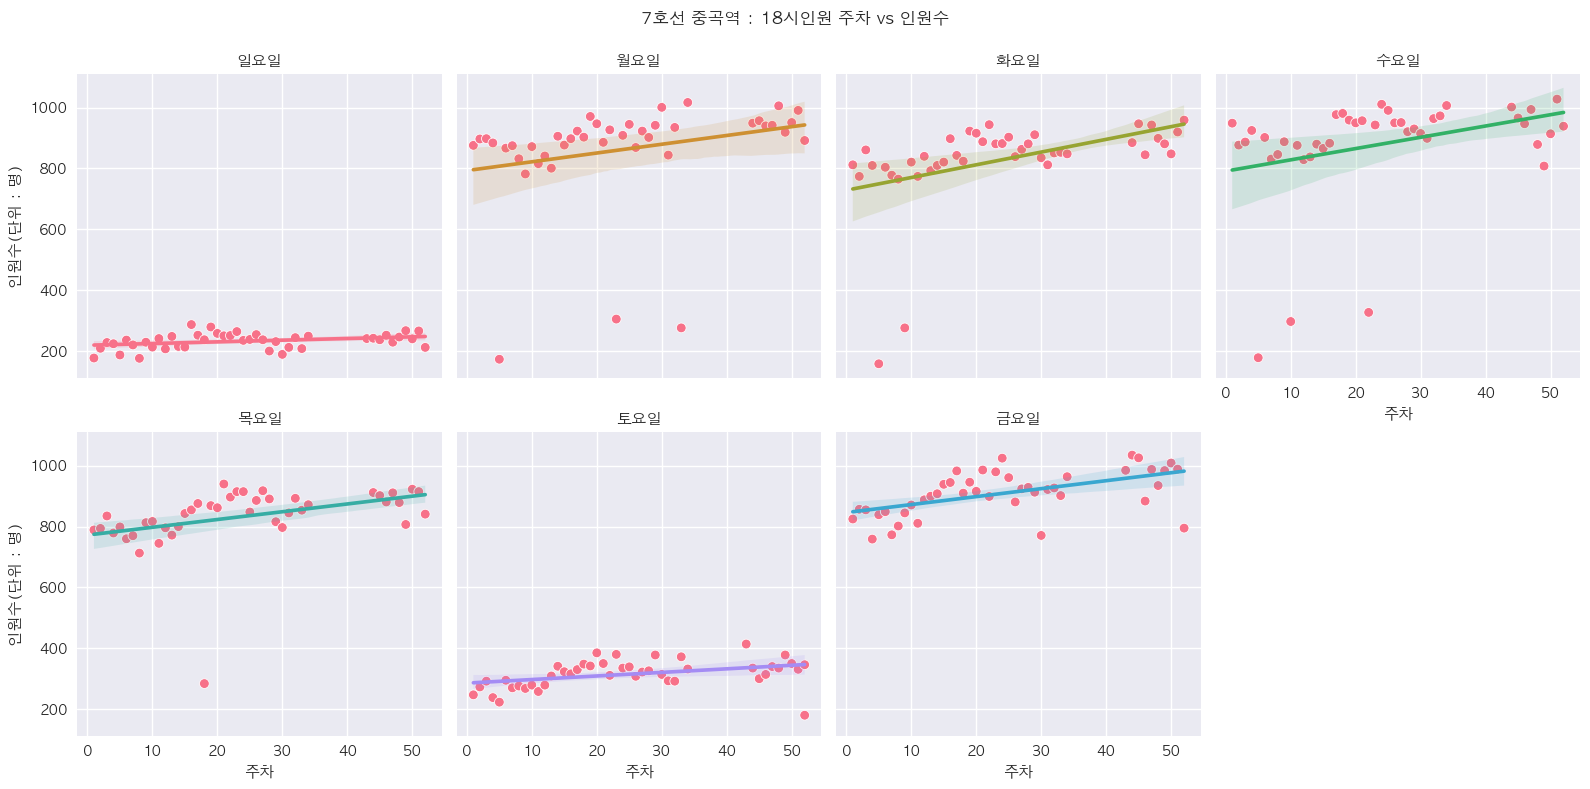

중곡의 역사 코드는 2726입니다


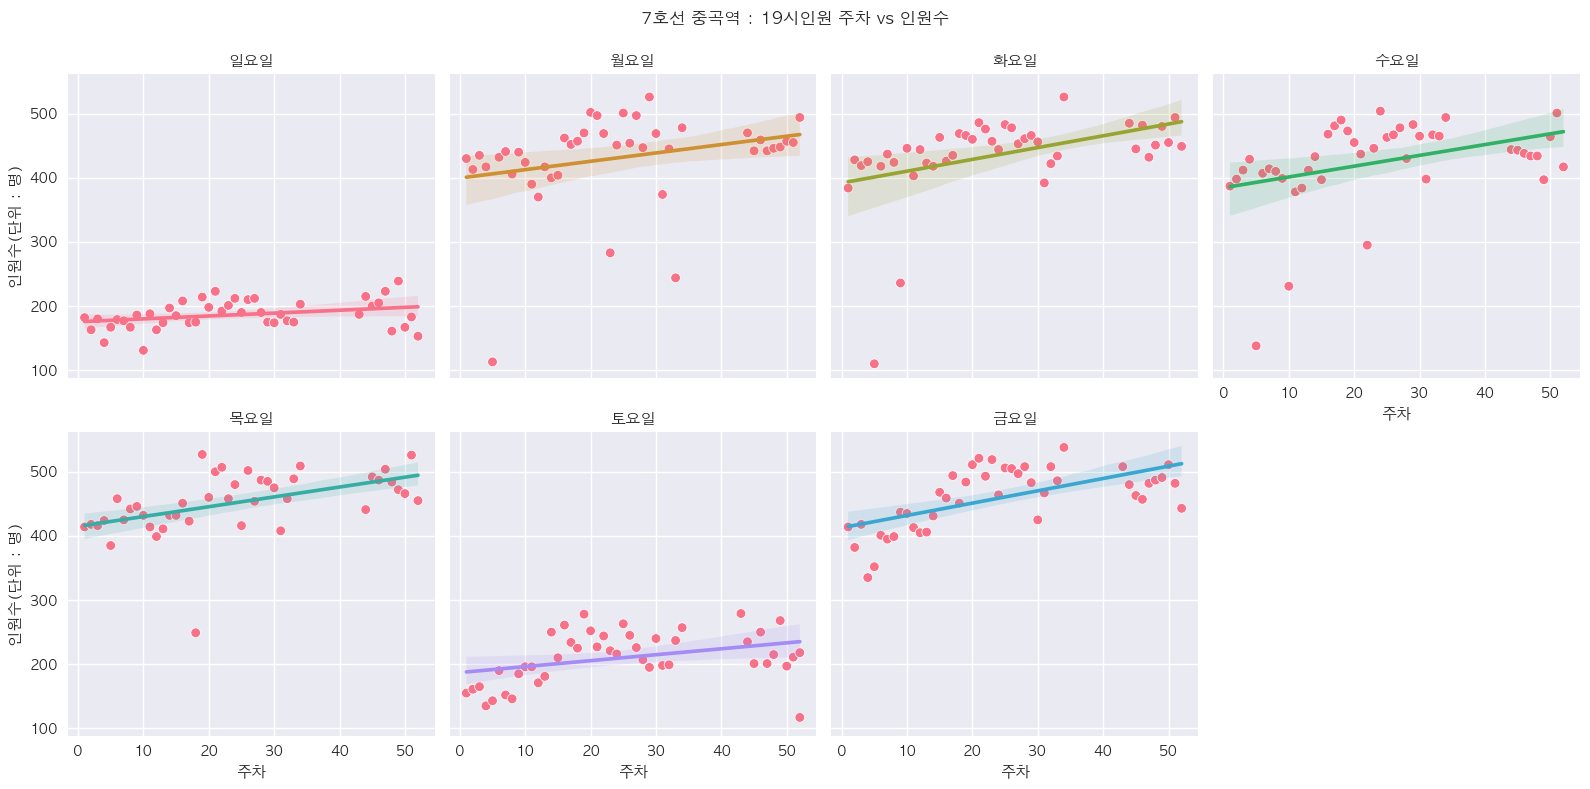

중곡의 역사 코드는 2726입니다


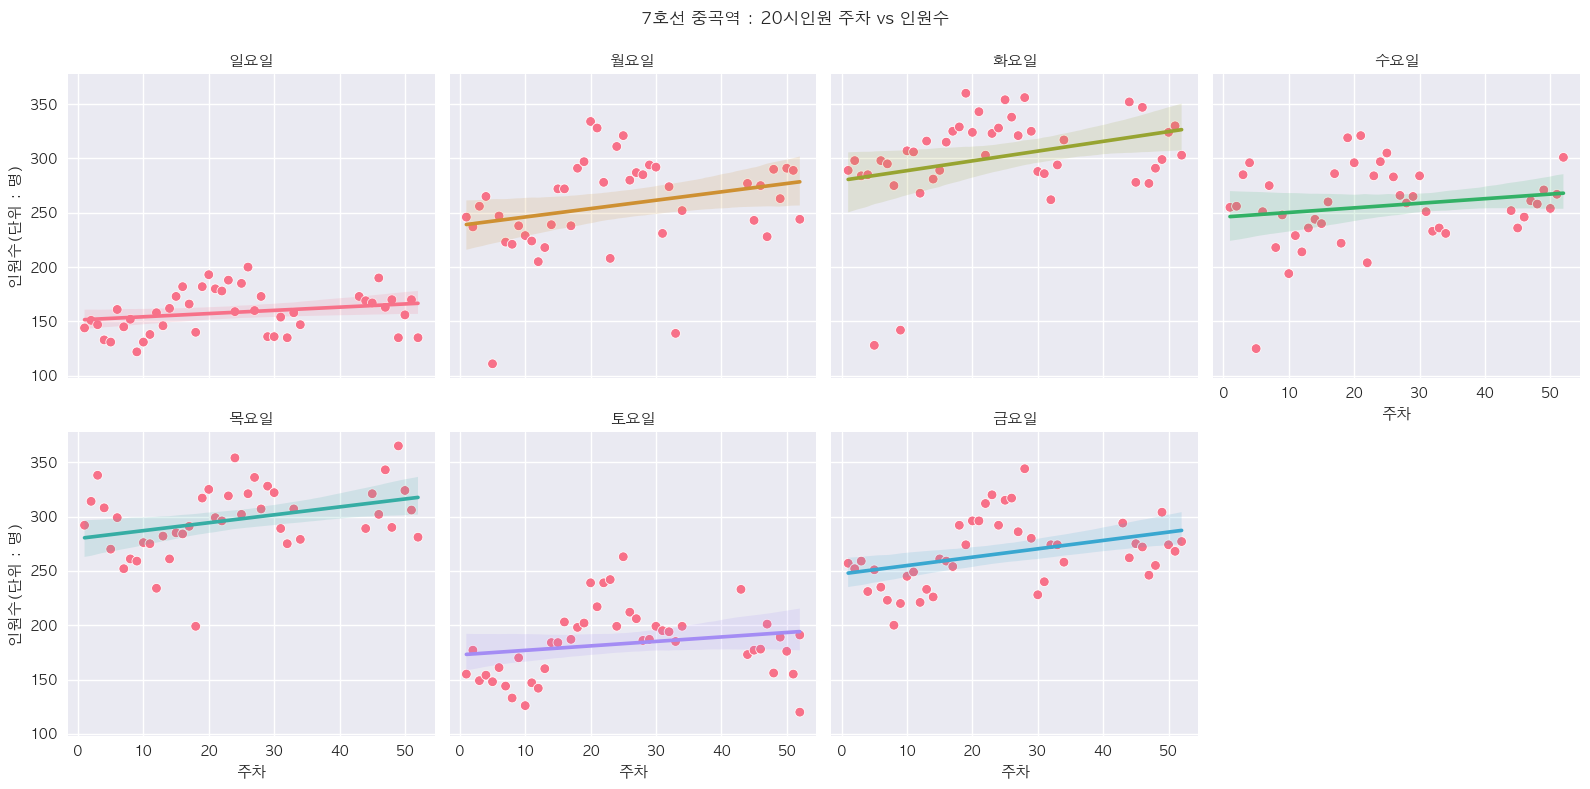

중곡의 역사 코드는 2726입니다


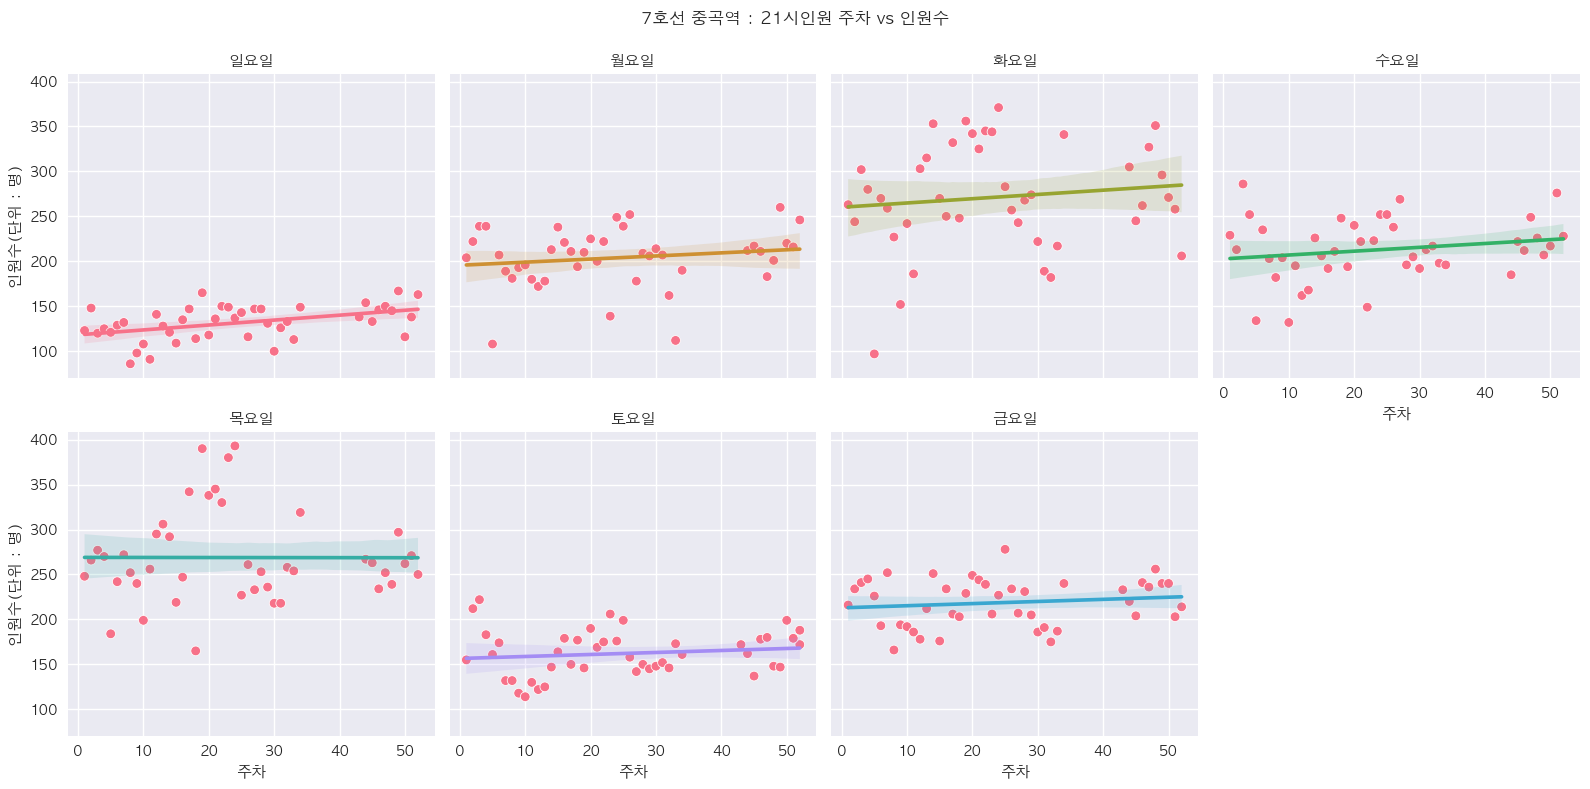

중곡의 역사 코드는 2726입니다


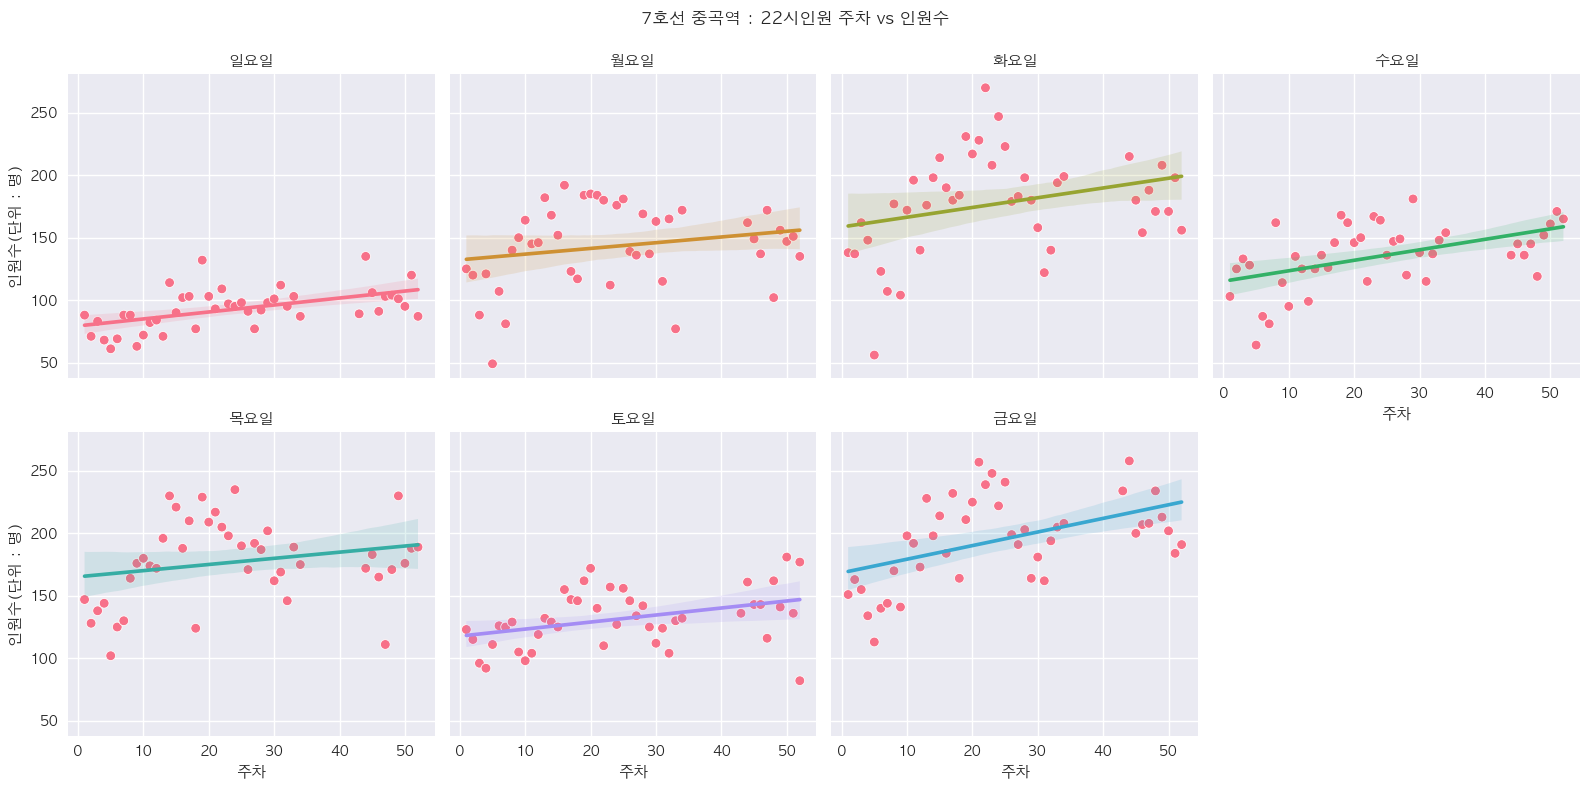

중곡의 역사 코드는 2726입니다


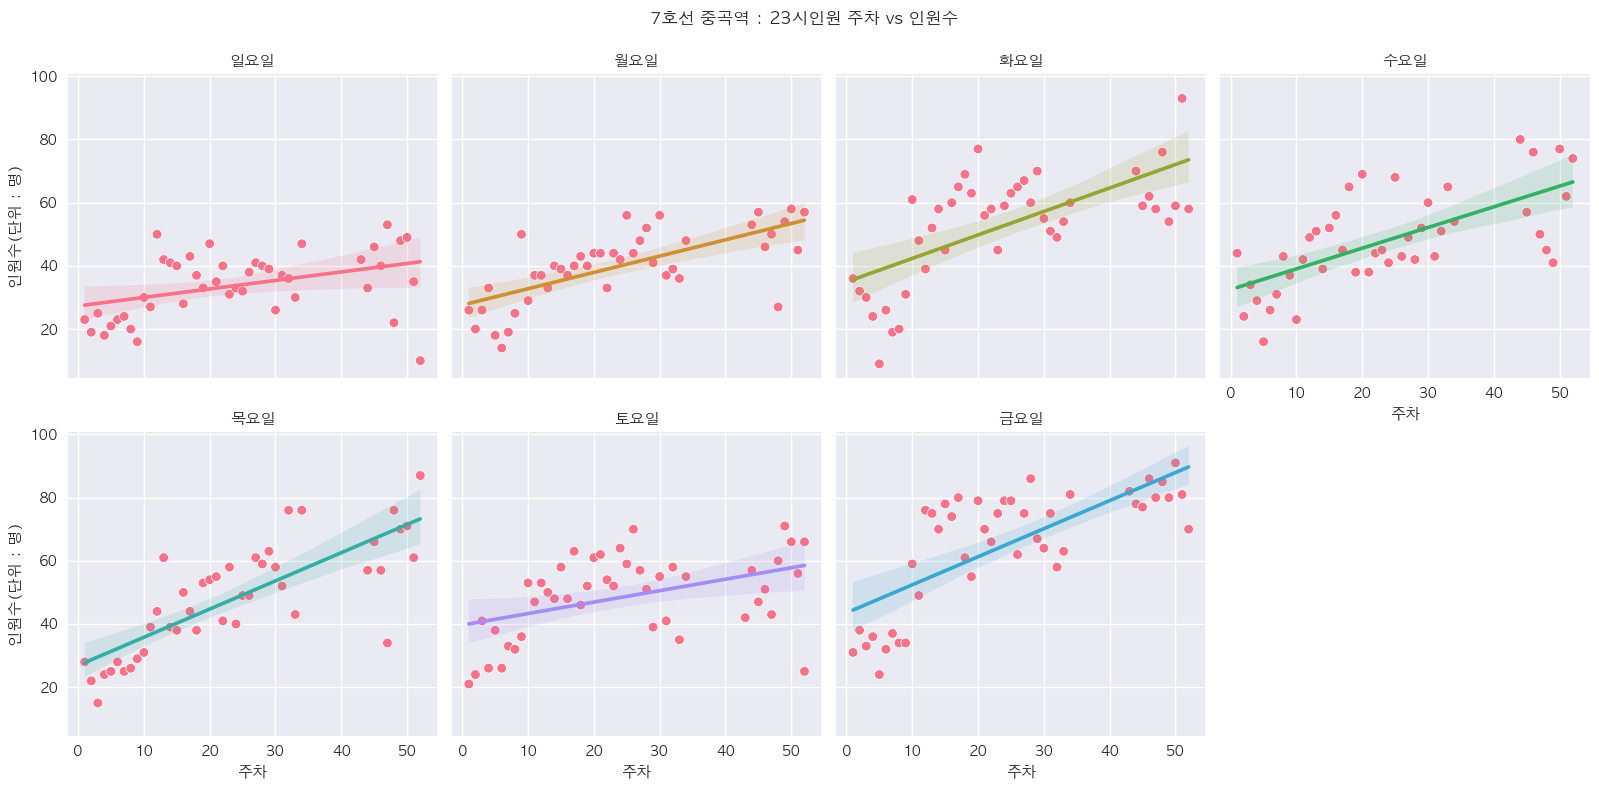

중곡의 역사 코드는 2726입니다


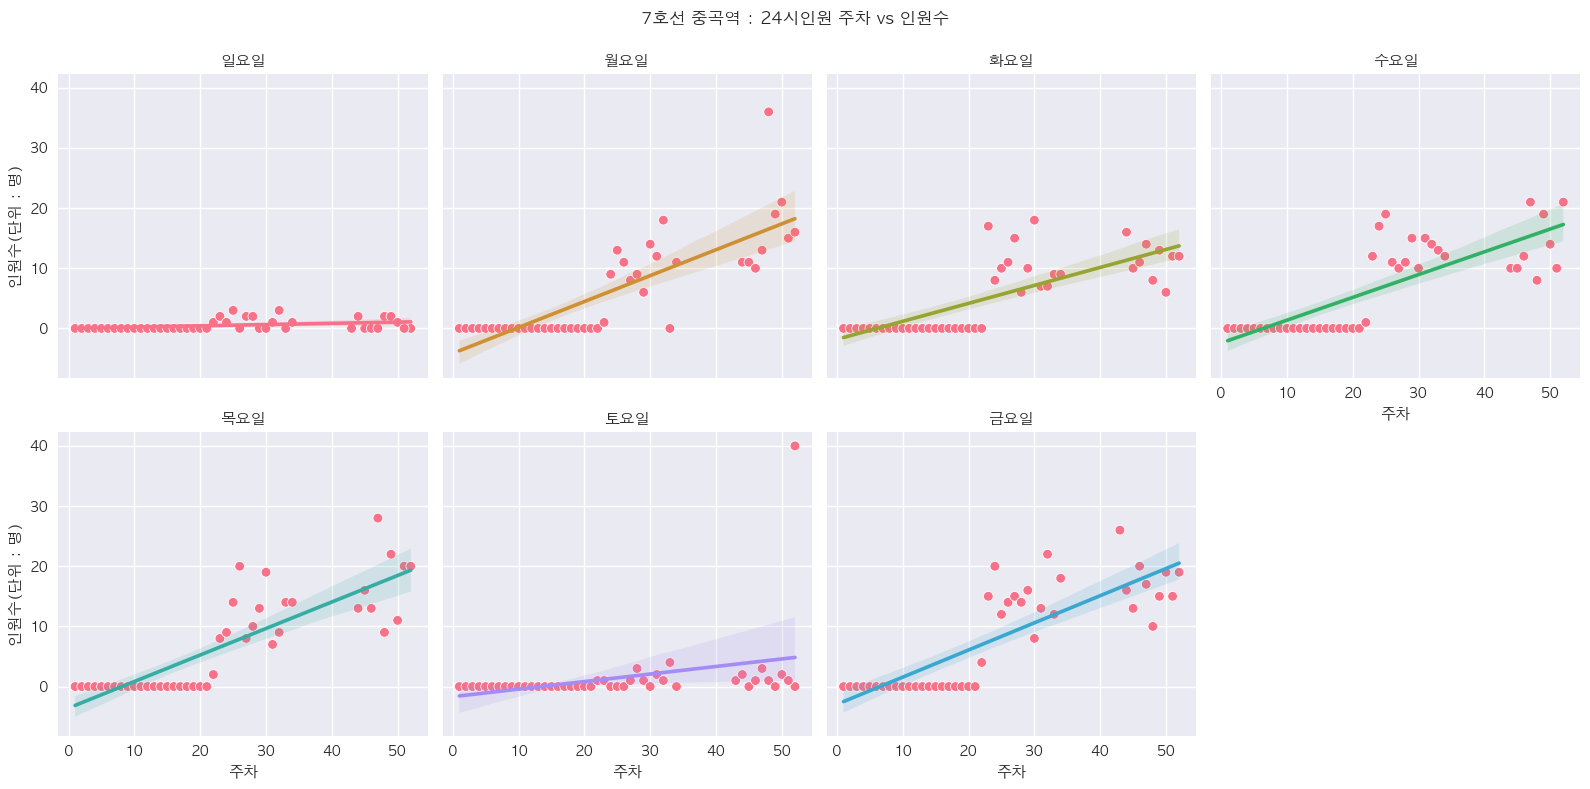

In [9]:


# training_table_승차와 target_table_승차가 이미 정의되고 로드되었다고 가정

# 두 테이블을 병합
test = pd.concat([training_table_승차, target_table_승차], axis=1)

def sdtation_inout_lmplot(mlTable, line, station_name, time_passenger):
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    code = Service.station_name_to_code(line, station_name)
    test = mlTable[mlTable['역사코드'] == code]
    
    # 숫자로 된 요일을 요일 이름으로 매핑
    day_mapping = {
        0: '일요일',
        1: '월요일',
        2: '화요일',
        3: '수요일',
        4: '목요일',
        5: '금요일',
        6: '토요일',
        7: '일요일'  # 0과 7이 모두 일요일이라고 가정
    }

    # '요일' 컬럼을 요일 이름으로 매핑
    test['요일'] = test['요일'].map(day_mapping)
    
    # 요일별로 색깔을 지정하기 위해 팔레트를 설정
    palette = sns.color_palette("husl", len(day_mapping))
    
    # 요일별로 플롯을 나누기 위해 FacetGrid 사용
    g = sns.FacetGrid(test, col='요일', col_wrap=4, height=4, aspect=1, palette=palette)
    g.map_dataframe(sns.scatterplot, '주차', time_passenger, hue='요일', palette=palette)
    
    # 각 요일별로 색깔을 지정한 regplot 추가
    for ax in g.axes.flatten():
        day = ax.get_title().split('=')[-1].strip()
        day_data = test[test['요일'] == day]
        sns.regplot(
            x='주차',
            y=time_passenger,
            data=day_data,
            scatter=False,
            ax=ax,
            color=palette[list(day_mapping.values()).index(day)]
        )
    
    # 제목 설정
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels('주차', '인원수(단위 : 명)')
    
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'{line} {station_name}역 : {time_passenger} 주차 vs 인원수')

    plt.show()



In [10]:


def station_name_to_code(line,station_name):
    stations = pd.read_csv('../Data/SubwayInfo.csv')
    target_line_stations = stations[stations['호선']==line]
    row = target_line_stations[station_name == target_line_stations['역이름']]
    print(f"{station_name}의 역사 코드는 {row['역코드'].values[0]}입니다")
    return row['역코드'].values[0]
station_name_to_code('7호선','중곡')


중곡의 역사 코드는 2726입니다


2726

In [13]:

test_array = ['05시인원', '06시인원', '07시인원', '08시인원', '09시인원', '10시인원', '11시인원', '12시인원',
       '13시인원', '14시인원', '15시인원', '16시인원', '17시인원', '18시인원', '19시인원', '20시인원',
       '21시인원', '22시인원', '23시인원', '24시인원']
for i in test_array:
    sdtation_inout_lmplot(test, '7호선', '중곡',i)

TypeError: Service.sdtation_inout_lmplot() takes 3 positional arguments but 4 were given

In [ ]:
target_table_승차.columns

Index(['05시인원', '06시인원', '07시인원', '08시인원', '09시인원', '10시인원', '11시인원', '12시인원',
       '13시인원', '14시인원', '15시인원', '16시인원', '17시인원', '18시인원', '19시인원', '20시인원',
       '21시인원', '22시인원', '23시인원', '24시인원'],
      dtype='object')

In [ ]:
training_table_승차['주차']
target_table_승차['07시인원']

0          21
1         597
2         682
3         614
4         661
         ... 
12805     375
12806    1893
12807     306
12808    1552
12809     305
Name: 07시인원, Length: 12810, dtype: int64

In [ ]:
target_line_stations

NameError: name 'target_line_stations' is not defined